In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np

## Frequency characteristic

Taken majorly from [Brain wave characteristic](http://www.brainev.com/core/Research-Benefits/Brainwaves.aspx)

### Beta
* Beta activity is quick-connect, fast activity and tends to dominate the normal waking state of consciousness when-attention is directed towards the outside world. 
* detected in the frontal lobes (where decisions are managed)
* Both sides of the brain
* tends to be the dominant rhythm in those who are alert, anxious or have their eyes open.

### Alpha
* represent a relaxed awareness in the mind
* Alpha rates are increased by closing the eyes and relaxing, yet are offset by opening one's eyes or any concentrated effort
* best detected in the frontal regions of the head, on each side of the brain.
* Alpha is the major rhythm seen in normal relaxed adults and is typically regarded as the common relaxation mode beyond the age of 13

### Theta
* indicate drowsiness, daydreaming, the first stage of sleep or 'indirect' imagination/thinking
* Theta activity is not often seen in awake adults (unless engaged in a meditative practice), but is perfectly normal in alert children up to 13 years and in most sleep
* Theta state can be regarded as a gateway to hypnagogic states that lay between being awake and falling asleep
* 

### Delta

* deep sleep or slow-wave 'background' thinking
* tends to be the highest in amplitude and the slowest waves. Delta is often associated with deep sleep. Certain frequencies, in the delta range, have been shown to trigger the body's healing and growth mechanisms.
* Delta is the dominant rhythm in infants up to one year, as well as stages 3 and 4 of dreamless sleep.

## Creating the dataset

In [2]:
freq_ranges = [[1.5, 3.5],  # delta Unconscious, deep sleep
               [3.5, 7.5],  # theta Reduced consciousnenss
               [7.5, 12.5],  # alpha Physical and mental relaxation
               [12.5, 19.5]]  # beta Engaged mind

samples_per_segment = 100
Time = np.arange(0, samples_per_segment)

sliding_window_size = 50

coeffs = np.random.normal(0, 1, (4,2))

frequencies = []
for freq in freq_ranges:
    frequencies.append(np.random.uniform(freq[0], freq[1]))
    
stds = [1, 2, 3, 4]


In [3]:
stds
li=[0.1,1,5,10]

for i in range(0, len(li)):
    print(li[i:]+li[:i])

[0.1, 1, 5, 10]
[1, 5, 10, 0.1]
[5, 10, 0.1, 1]
[10, 0.1, 1, 5]


In [4]:
TS = []
for i, freq in enumerate(frequencies):
    std = stds[i:]+stds[:i]
    rvals = np.random.normal(0, 0.5, len(frequencies))
    
    delta = np.random.normal(0, std[0], Time.shape[0]) * rvals[0]
    theta = np.random.normal(0, std[1], Time.shape[0]) * rvals[1]
    alpha = np.random.normal(0, std[3], Time.shape[0]) * rvals[2]
    beta = np.random.normal(0, std[2], Time.shape[0]) * rvals[3]
    
    
    delta_signal = delta * np.cos(frequencies[0] * Time) + delta * np.sin(frequencies[0] * Time)
    theta_signal = theta * np.cos(frequencies[1] * Time) + theta * np.sin(frequencies[1] * Time)
    alpha_signal = alpha * np.cos(frequencies[2] * Time) + alpha * np.sin(frequencies[2] * Time)
    beta_signal = beta * np.cos(frequencies[3] * Time) + beta * np.sin(frequencies[3] * Time)
    
    TS = np.hstack((TS, delta_signal + theta_signal + alpha_signal + beta_signal))
    
    Time = Time + Time.shape[0]

In [5]:
plt.close()

<IPython.core.display.Javascript object>


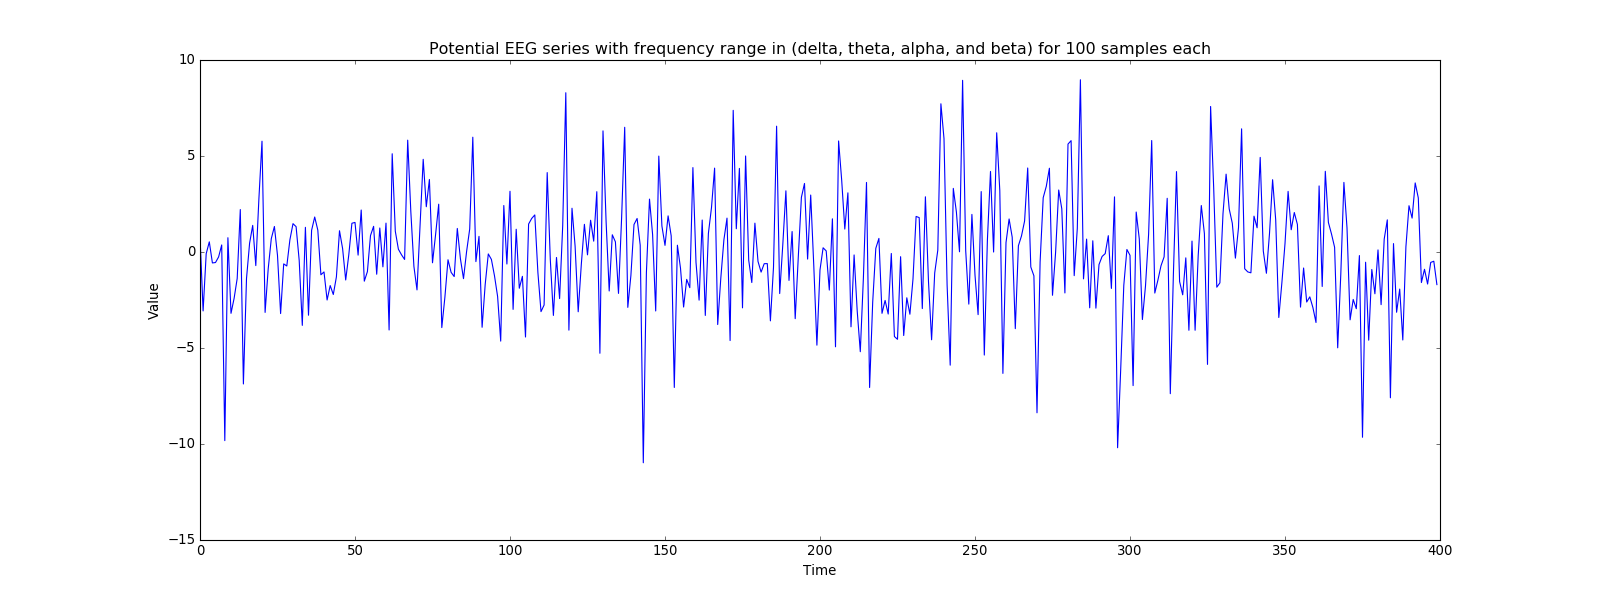

In [6]:
plt.figure(figsize=(20,7.5))
plt.plot(TS)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Potential EEG series with frequency range in (delta, theta, alpha, and beta) for 100 samples each")

In [7]:
plt.close()

In [8]:
print(TS.std(), TS.mean())

3.04861133405 -0.156208723591


## Peridogram

In [11]:
def get_peridogram(segment, u, segment_times):
    return (1/(2*np.pi*segment.shape[0])) * np.power(np.sum(segment * np.power(np.e, 1J*u*segment_times)), 2)

In [17]:
peridograms = []
for freq in np.linspace(0, np.pi, 200):
    peridograms.append(get_peridogram(TS[0:100], freq, np.arange(0, 100)))

<IPython.core.display.Javascript object>


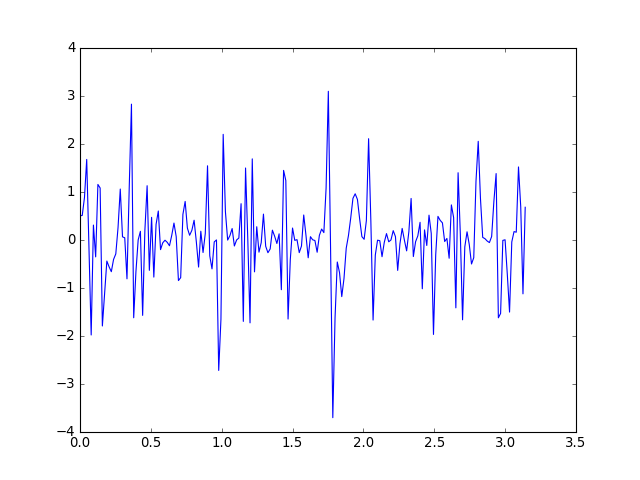

/home/anirudhan/workspace/Change-Point-Detection/.venv/lib/python3.4/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [18]:
plt.plot(np.linspace(0, np.pi, 200), peridograms)